In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import xarray as xr
from isce2_topsapp.solid_earth_tides import compute_solid_earth_tide_from_gunw, update_gunw_with_solid_earth_tide

Using default ISCE Path: /Users/cmarshak/mambaforge/envs/topsapp_env/lib/python3.9/site-packages/isce
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2023-04-26 09:54:01,197 - matplotlib.font_manager - DEBUG - Using fontManager instance from /Users/cmarshak/.matplotlib/fontlist-v330.json


In [3]:
gunw_path = Path('set_test_data/S1-GUNW-A-R-064-tops-20210723_20210711-015000-00119W_00033N-PP-6267-v2_0_6.nc')
isce_data_dir = Path('set_test_data/')

In [4]:
set_ds_ref = compute_solid_earth_tide_from_gunw(gunw_path=gunw_path, 
                                                reference_or_secondary='reference',
                                                isce_data_dir=isce_data_dir)
set_ds_ref

 13%|████████████▌                                                                                  | 511/3848 [00:06<00:40, 82.60it/s]

Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial

 26%|████████████████████████▋                                                                      | 999/3848 [00:13<00:40, 70.67it/s]

: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by -

 39%|████████████████████████████████████▌                                                         | 1496/3848 [00:19<00:28, 81.32it/s]


Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomia

 52%|████████████████████████████████████████████████▊                                             | 1997/3848 [00:26<00:25, 72.74it/s]

r: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by 

 65%|████████████████████████████████████████████████████████████▉                                 | 2492/3848 [00:33<00:16, 81.24it/s]

	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomi

 78%|█████████████████████████████████████████████████████████████████████████                     | 2991/3848 [00:39<00:11, 72.71it/s]

er: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by

 91%|█████████████████████████████████████████████████████████████████████████████████████         | 3484/3848 [00:46<00:04, 74.25it/s]

0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Polynom

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 3848/3848 [00:51<00:00, 75.11it/s]


<xarray.Dataset>
Dimensions:         (height: 4, latitude: 26, longitude: 37)
Coordinates:
  * longitude       (longitude) float64 -119.2 -119.1 -119.0 ... -115.7 -115.6
  * latitude        (latitude) float64 35.7 35.6 35.5 35.4 ... 33.4 33.3 33.2
  * height          (height) float64 -1.5e+03 0.0 3e+03 9e+03
    spatial_ref     int64 0
Data variables:
    solidEarthTide  (height, latitude, longitude) float32 -32.34 ... -23.94

ISCE2 resets log level.

In [10]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

[(-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001),
 (-119.25, -115.55000000000001)]

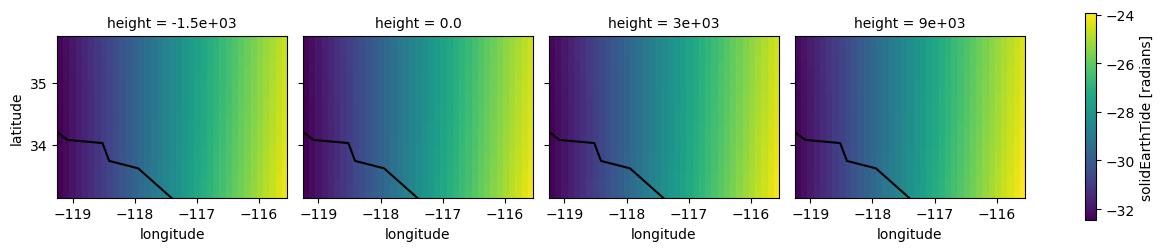

In [13]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
xmin, ymin, xmax, ymax = set_ds_ref.rio.bounds()

s = set_ds_ref['solidEarthTide'].plot.imshow(col='height', 
                                             col_wrap=4, 
                                             extent=[xmin, ymin, xmax, ymax])
[df_world.boundary.plot(ax=ax, color='black') for ax in s.axs[0]]
[ax.set_ylim(ymin, ymax) for ax in s.axs[0]]
[ax.set_xlim(xmin, xmax) for ax in s.axs[0]]